In [1]:
import xml.etree.ElementTree as et
import pandas as pd
%matplotlib inline

In [2]:
xtree = et.parse("data/commonNoun_Morphalou3_LMF.xml")
xroot = xtree.getroot()

In [3]:
dict_list = []
counter = 0

for le in xroot.iter('lexicalEntry'):
    le_dict = {}
    for lemma in le.iter('lemmatizedForm'):
        le_dict['lemma'] = lemma.find('orthography').text
        try:
            le_dict['gender'] = lemma.find('grammaticalGender').text
        except:
            pass
        le_dict['category'] = lemma.find('grammaticalCategory').text
        
    for form in le.iter('inflectedForm'):
        gn = form.find('grammaticalNumber').text
        le_dict[gn] = form.find('orthography').text
    
    dict_list.append(le_dict)
    counter += 1
    if counter % 1000 == 0:
        print('.', end='')

......................................................................................................

In [4]:
nouns_df = pd.DataFrame(dict_list)
nouns_df

,lemma,gender,category,invariable,singular,plural
0,100-mètres,masculine,commonNoun,100-mètres,NaN,NaN
1,2D,feminine,commonNoun,2D,NaN,NaN
2,3D,feminine,commonNoun,3D,NaN,NaN
3,A,masculine,commonNoun,µA,NaN,NaN
4,a,masculine,commonNoun,a,NaN,NaN
...,...,...,...,...,...,...
102220,φ,masculine,commonNoun,φ,NaN,NaN
102221,χ,masculine,commonNoun,χ,NaN,NaN
102222,ψ,masculine,commonNoun,ψ,NaN,NaN
102223,ω,masculine,commonNoun,ω,NaN,NaN


In [5]:
nouns_df.to_csv('all_nouns.csv')

In [6]:
fem_sg = nouns_df[(nouns_df.singular.notna()) & (nouns_df.gender == 'feminine')].singular

In [7]:
fem_sg

15                 abadie
17                abaisse
21               abaissée
22                abajoue
29         abandonnatrice
               ...       
102190         œstromanie
102191            œstrone
102195              œuvre
102196    œuvre-testament
102197           œuvrette
Name: singular, Length: 42909, dtype: object

In [8]:
import sys
sys.path.append('../FlauBERT')

In [9]:
from we import *

/Users/egoliakova/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [10]:
model, tokenizer, log = initiate_model()

Some weights of the model checkpoint at flaubert/flaubert_small_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
fem_sg_df = create_words_df(model, tokenizer, fem_sg, progress=True)

...........................................

In [12]:
fem_sg_df.std().sort_values()

508     1.874662
158     2.099462
408     2.102392
229     2.109621
321     2.138848
         ...    
221     3.639976
52      3.653160
212     3.812154
361     3.823400
371    14.033933
Length: 512, dtype: float32

In [13]:
fem_sg_df.median().sort_values()

52     -9.820407
274    -8.326418
138    -6.183359
470    -6.051425
181    -5.191989
         ...    
326     5.937900
195     6.247707
44      7.165567
250     8.364001
371    36.998177
Length: 512, dtype: float32

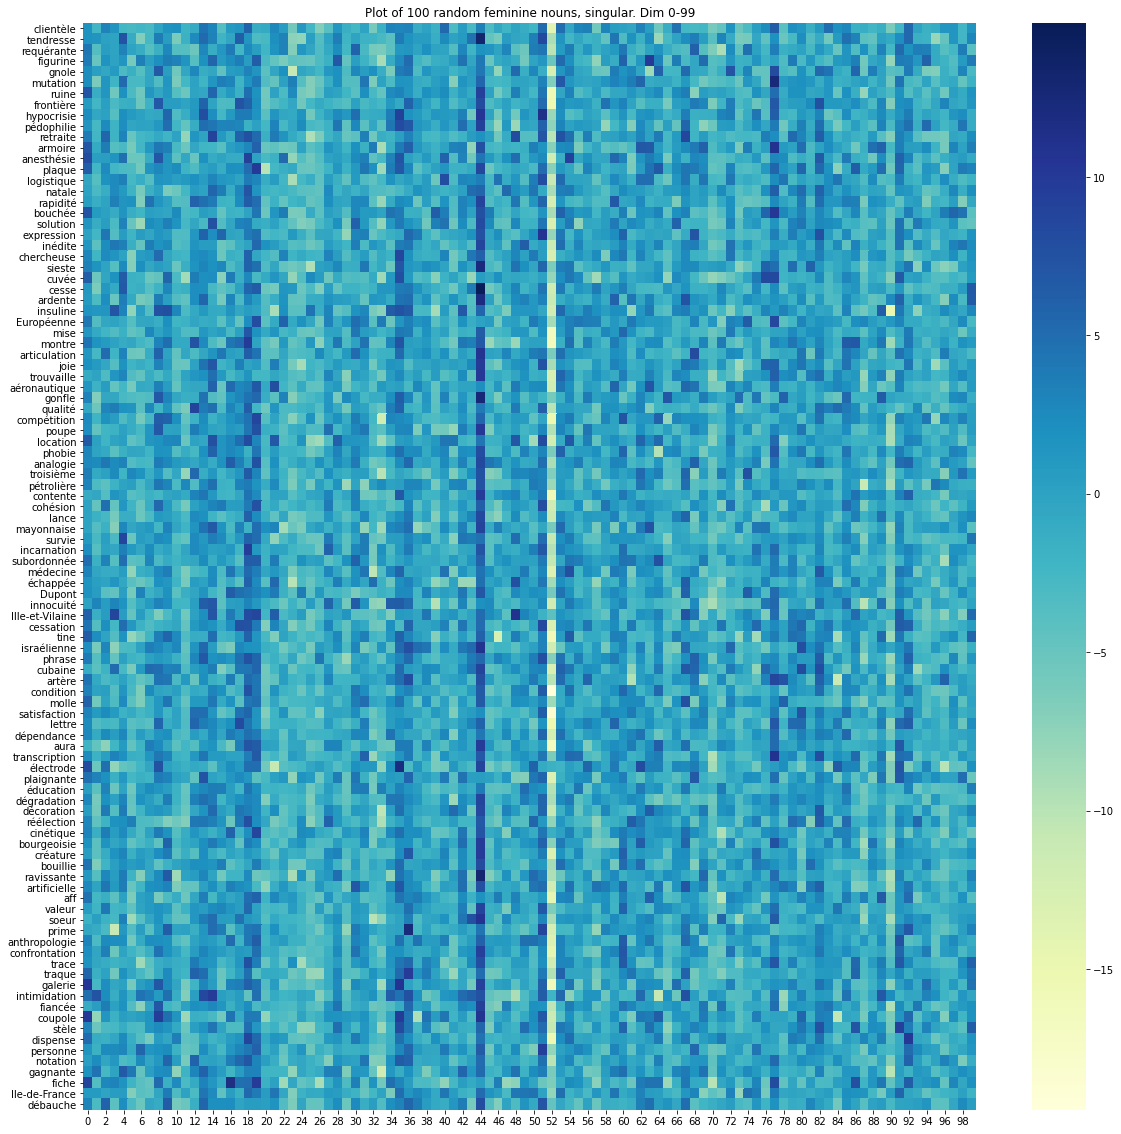

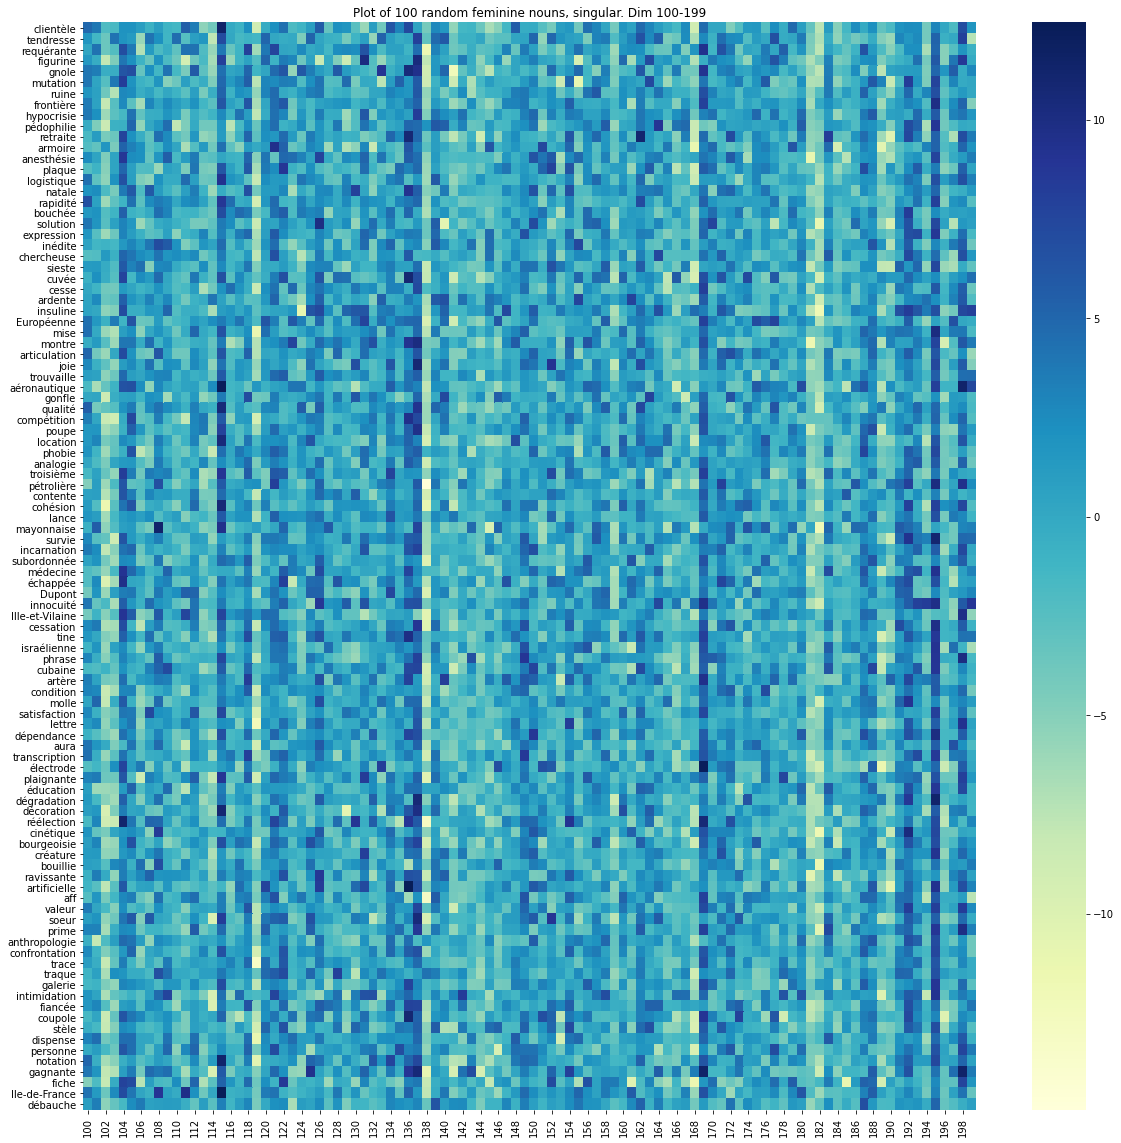

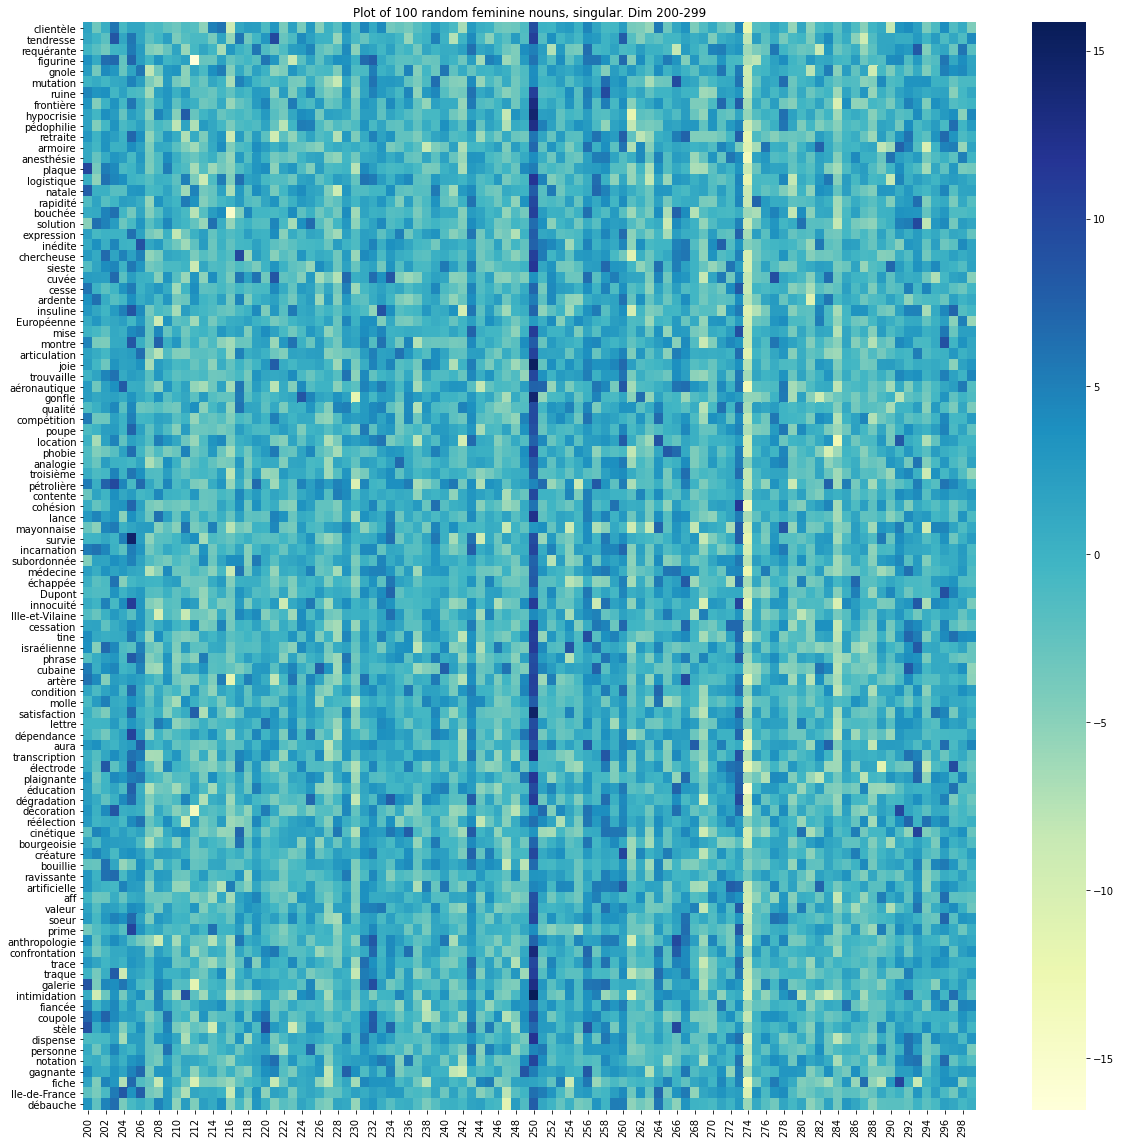

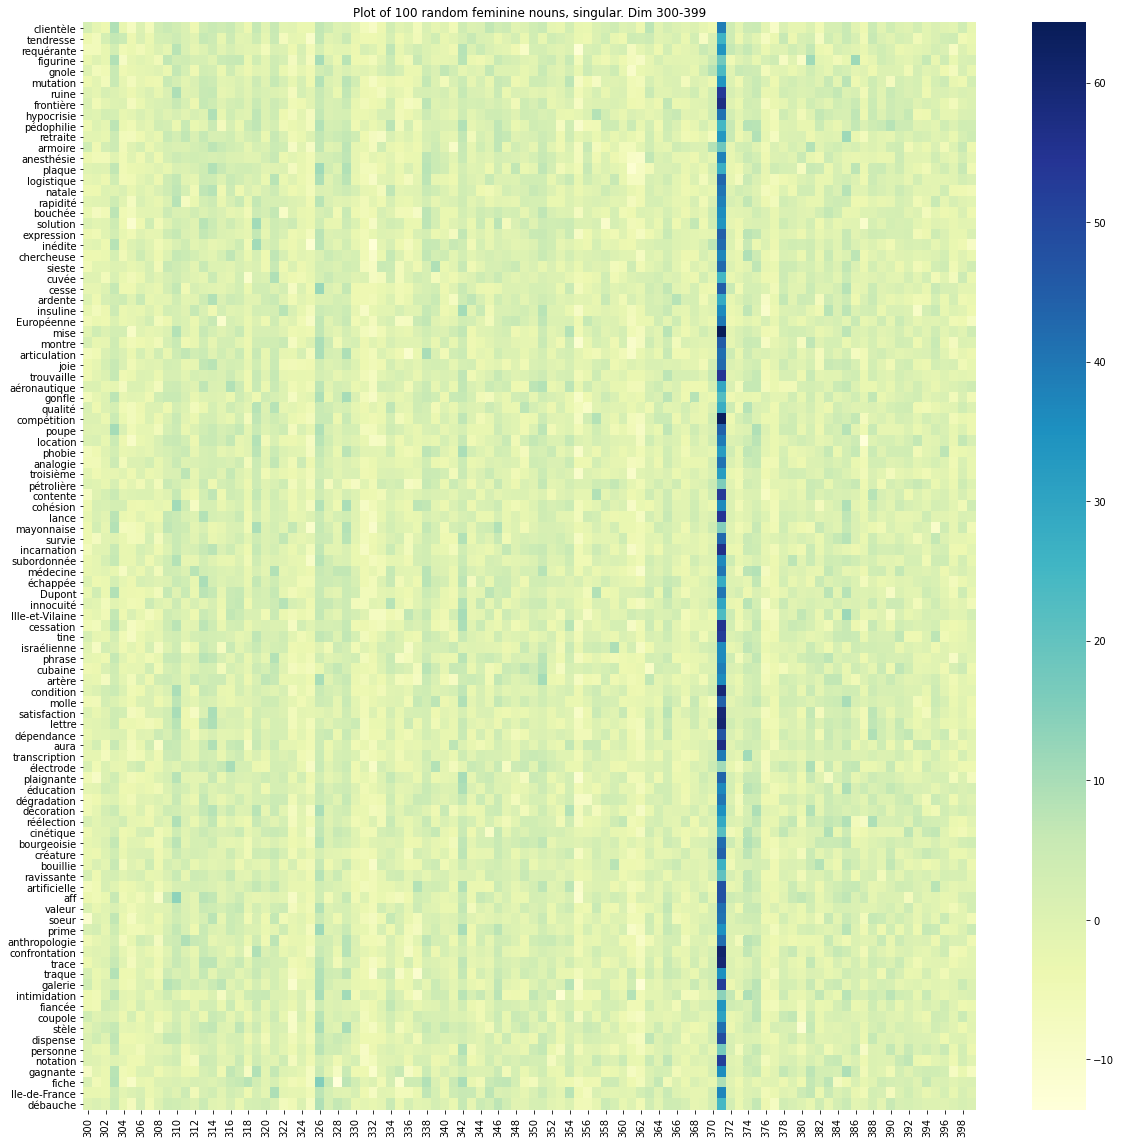

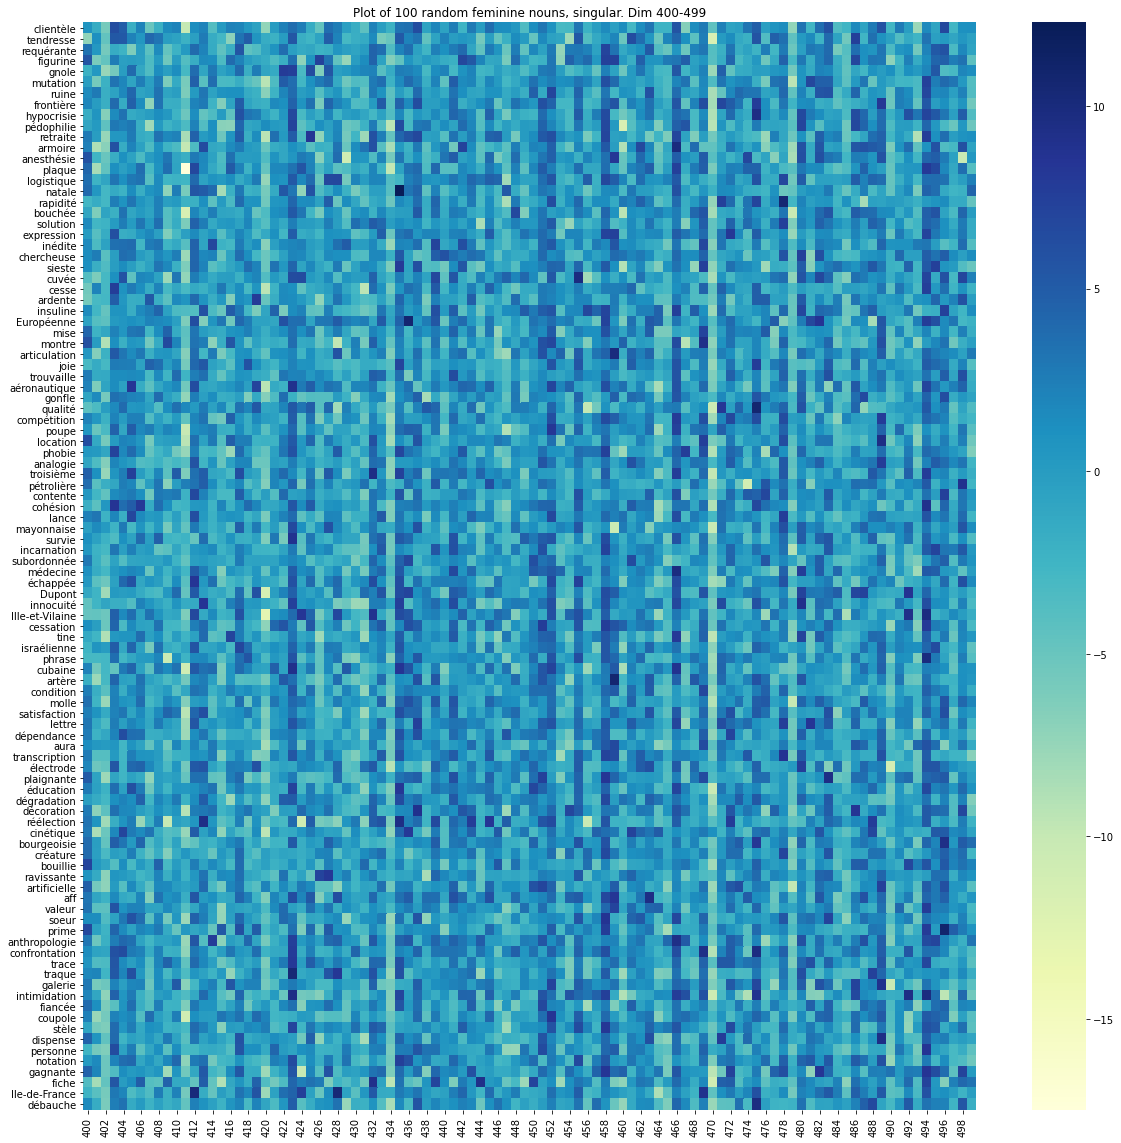

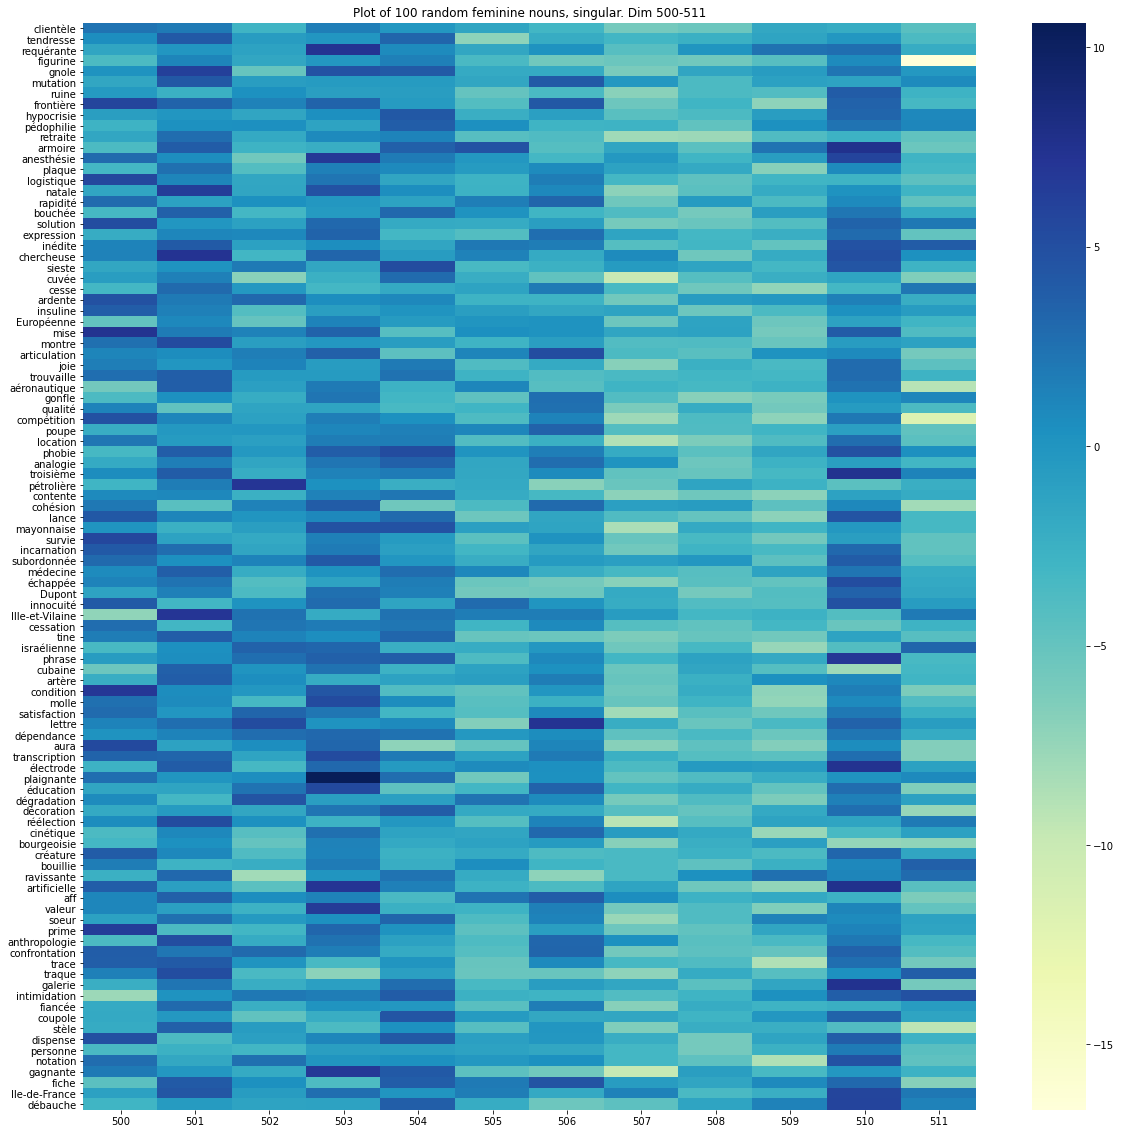

In [14]:
plot_we_heatmap(fem_sg_df.sample(n=100), size=(20, 20), label = 'Plot of 100 random feminine nouns, singular')

In [15]:
fem_pl = nouns_df[(nouns_df.plural.notna()) & (nouns_df.gender == 'feminine')].plural

In [16]:
fem_pl_df = create_words_df(model, tokenizer, fem_pl, progress=True)

........................................

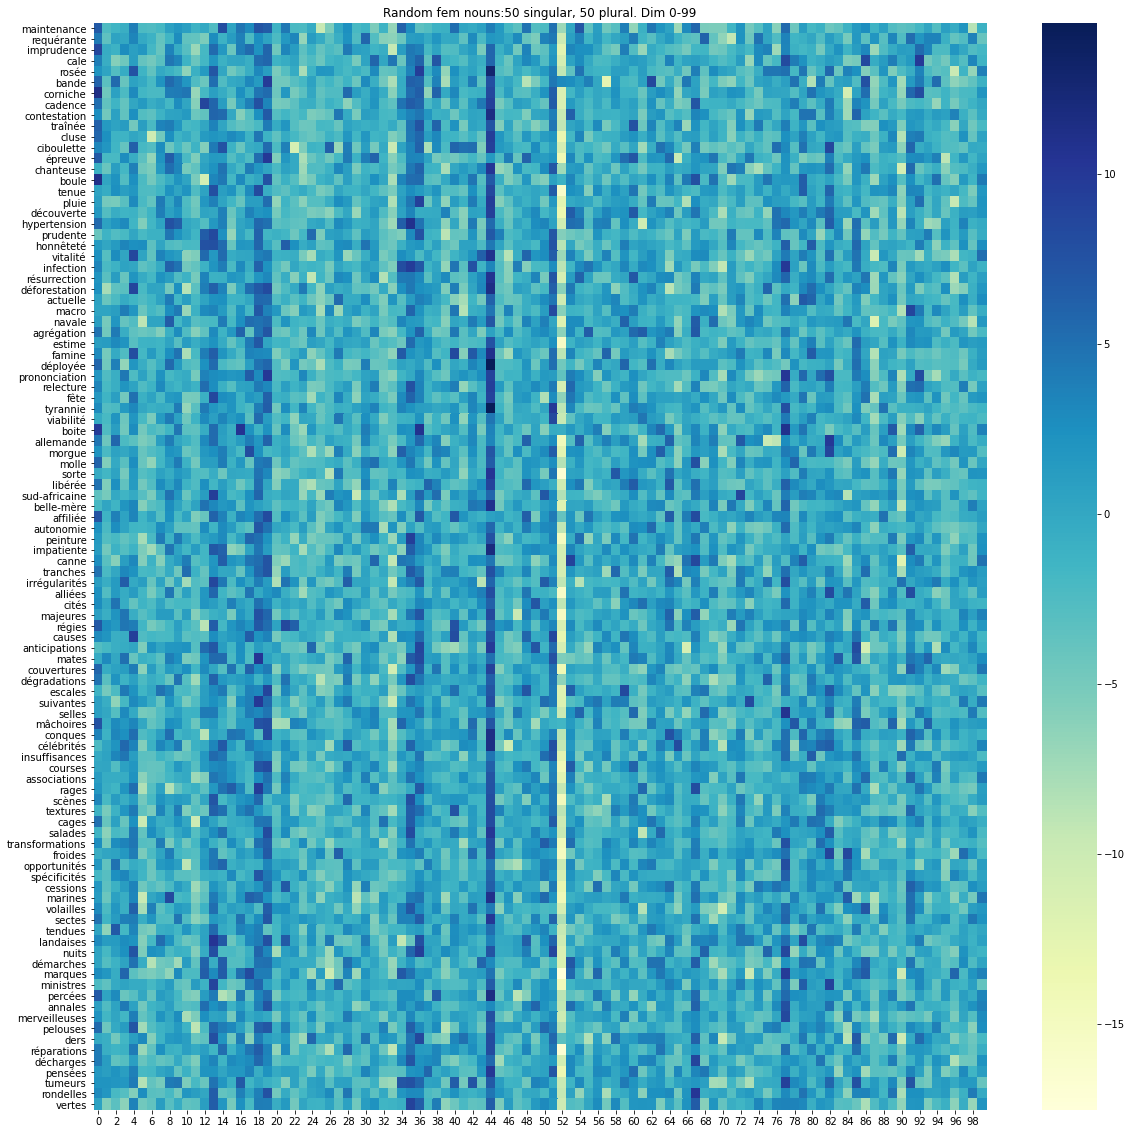

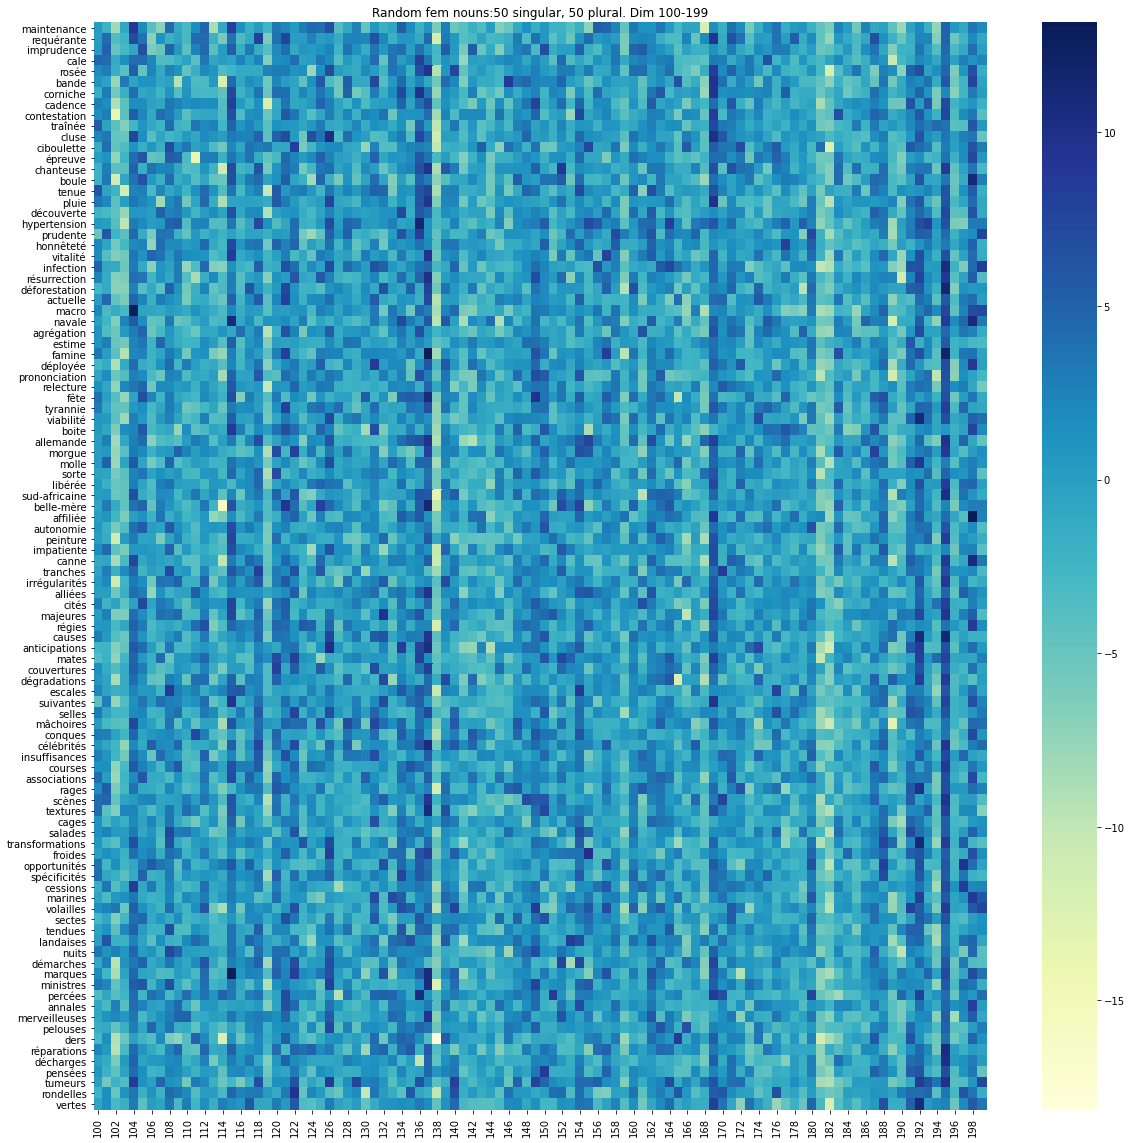

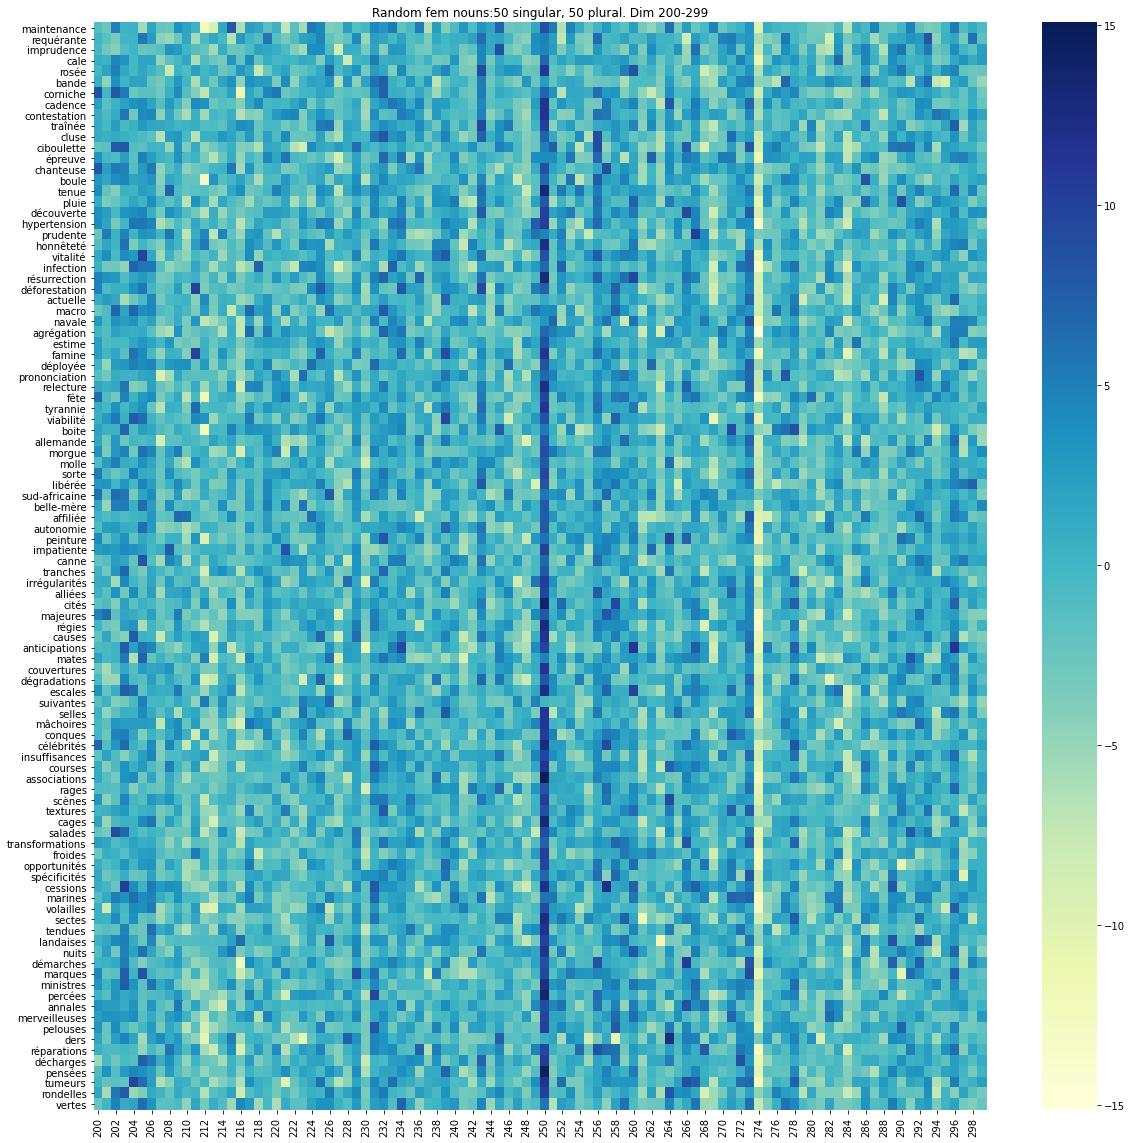

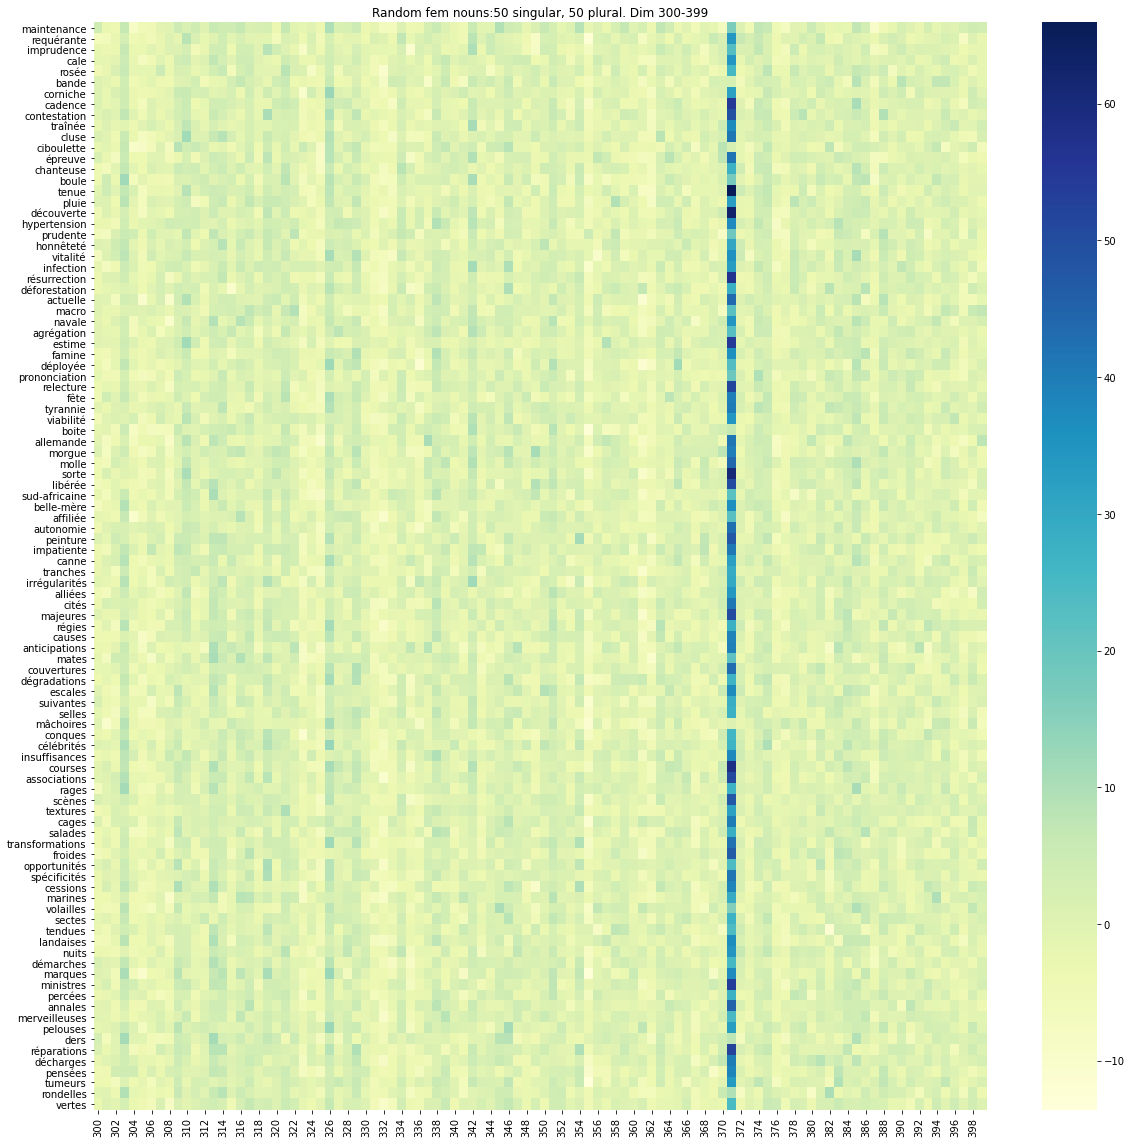

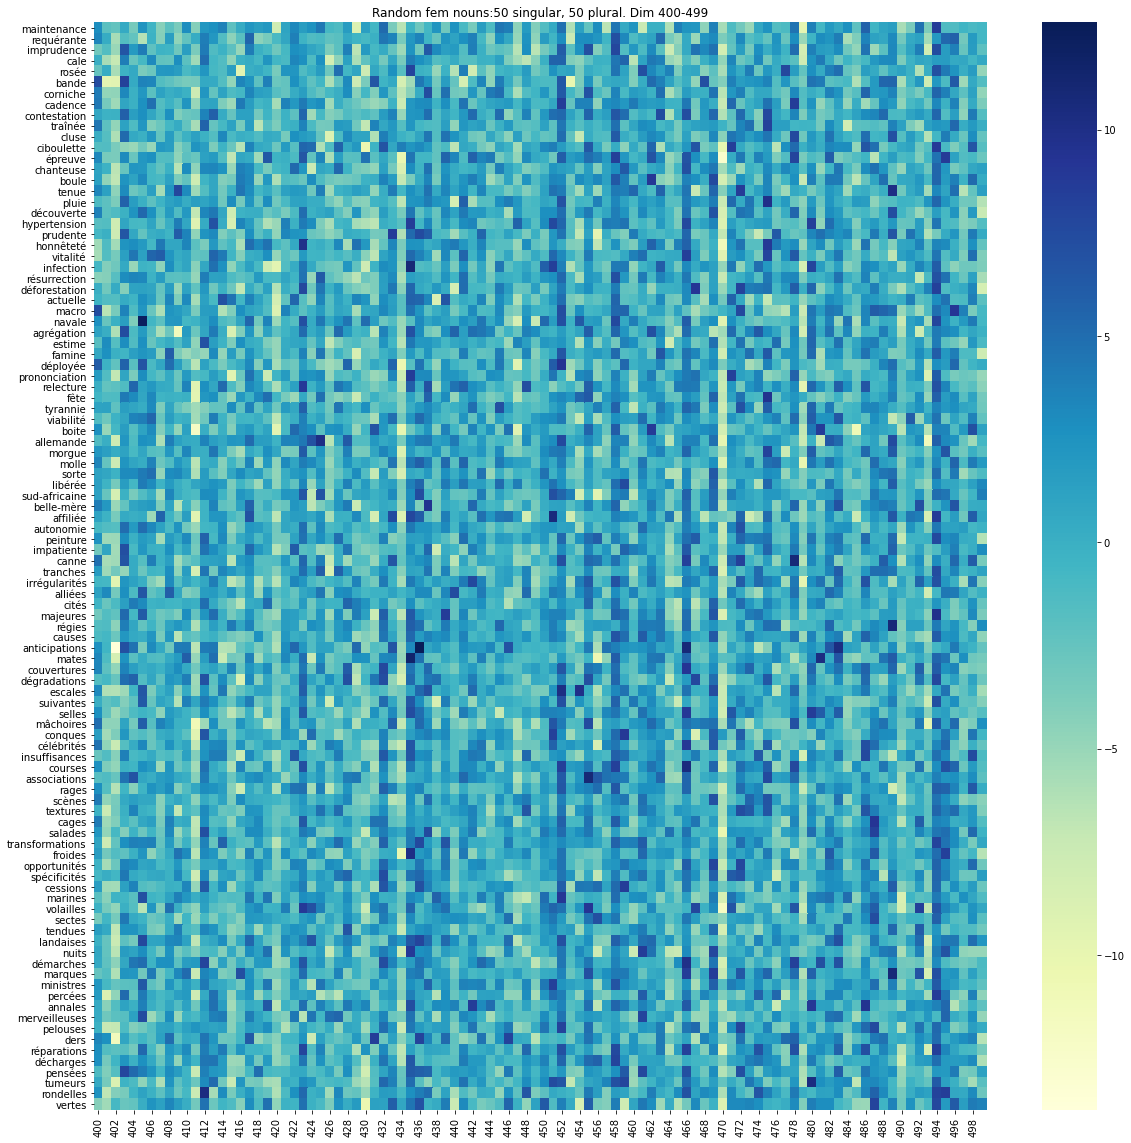

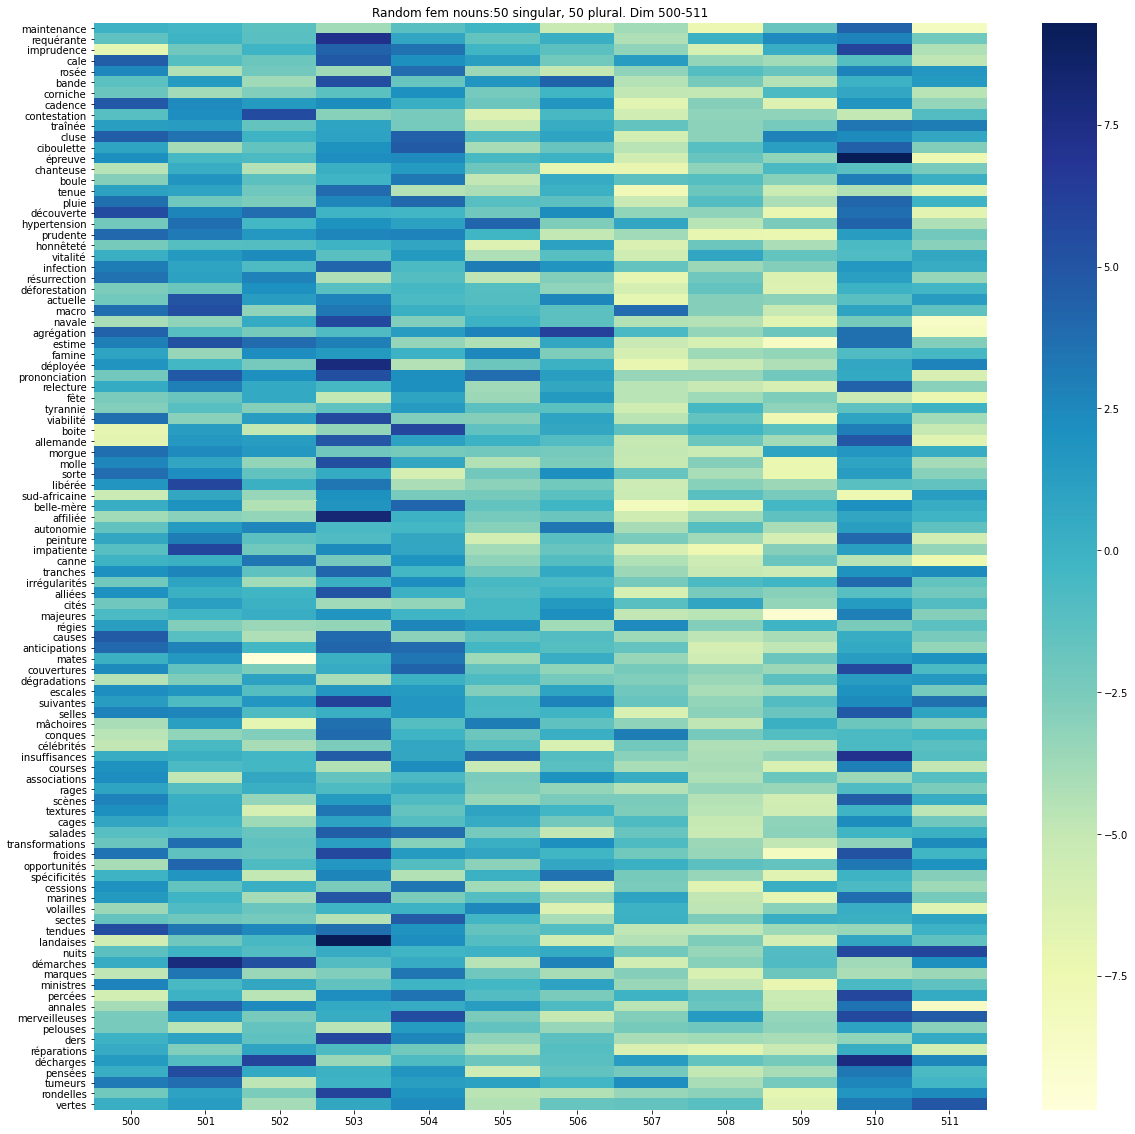

In [17]:
plot_we_heatmap(pd.concat([fem_sg_df.sample(n=50), fem_pl_df.sample(n=50)]), size=(20,20), label='Random fem nouns:'
                '50 singular, 50 plural')

In [18]:
masc_sg = nouns_df[(nouns_df.singular.notna()) & (nouns_df.plural.notna()) & (nouns_df.gender == 'masculine')].singular
masc_sg

10         aalénien
11              aba
12            abaca
13          abacule
14          abaddir
            ...    
102185        œstre
102186      œstriol
102187    œstrogène
102193          œuf
102194      œufrier
Name: singular, Length: 42469, dtype: object

In [19]:
masc_sg_df = create_words_df(model, tokenizer, masc_sg, progress=True)

...........................................

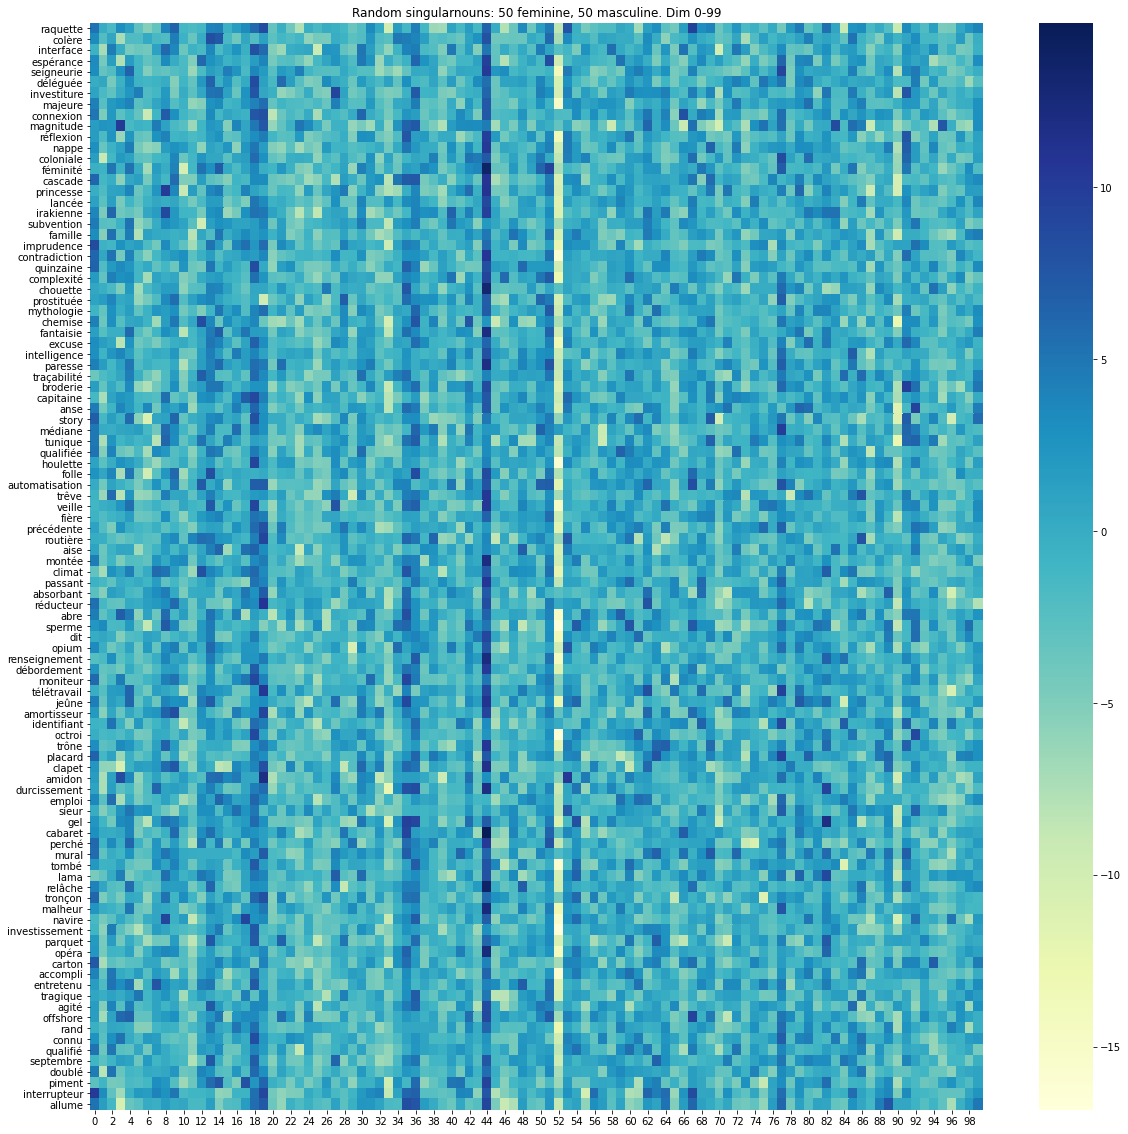

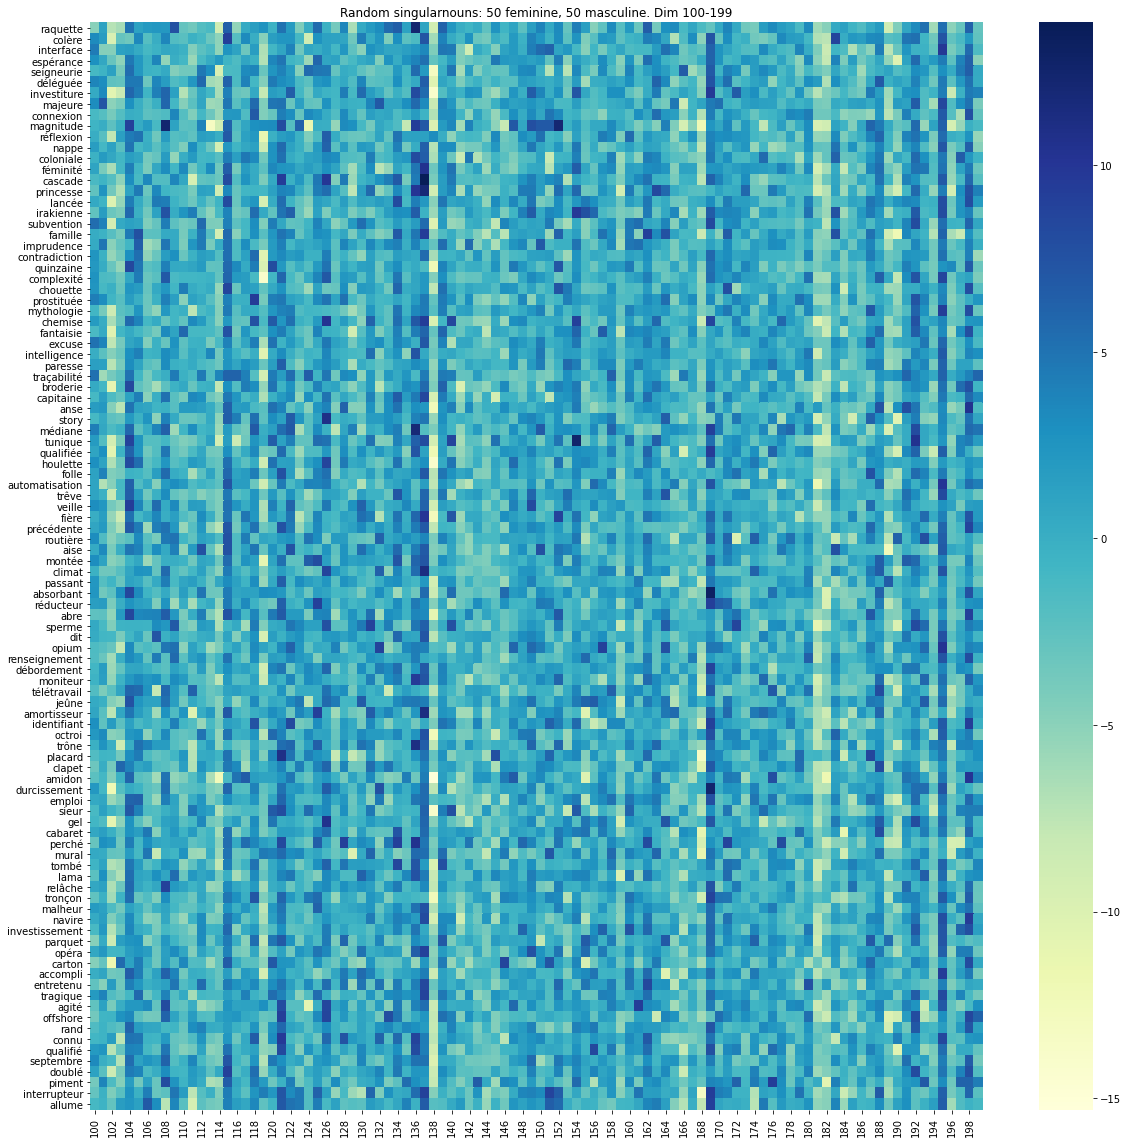

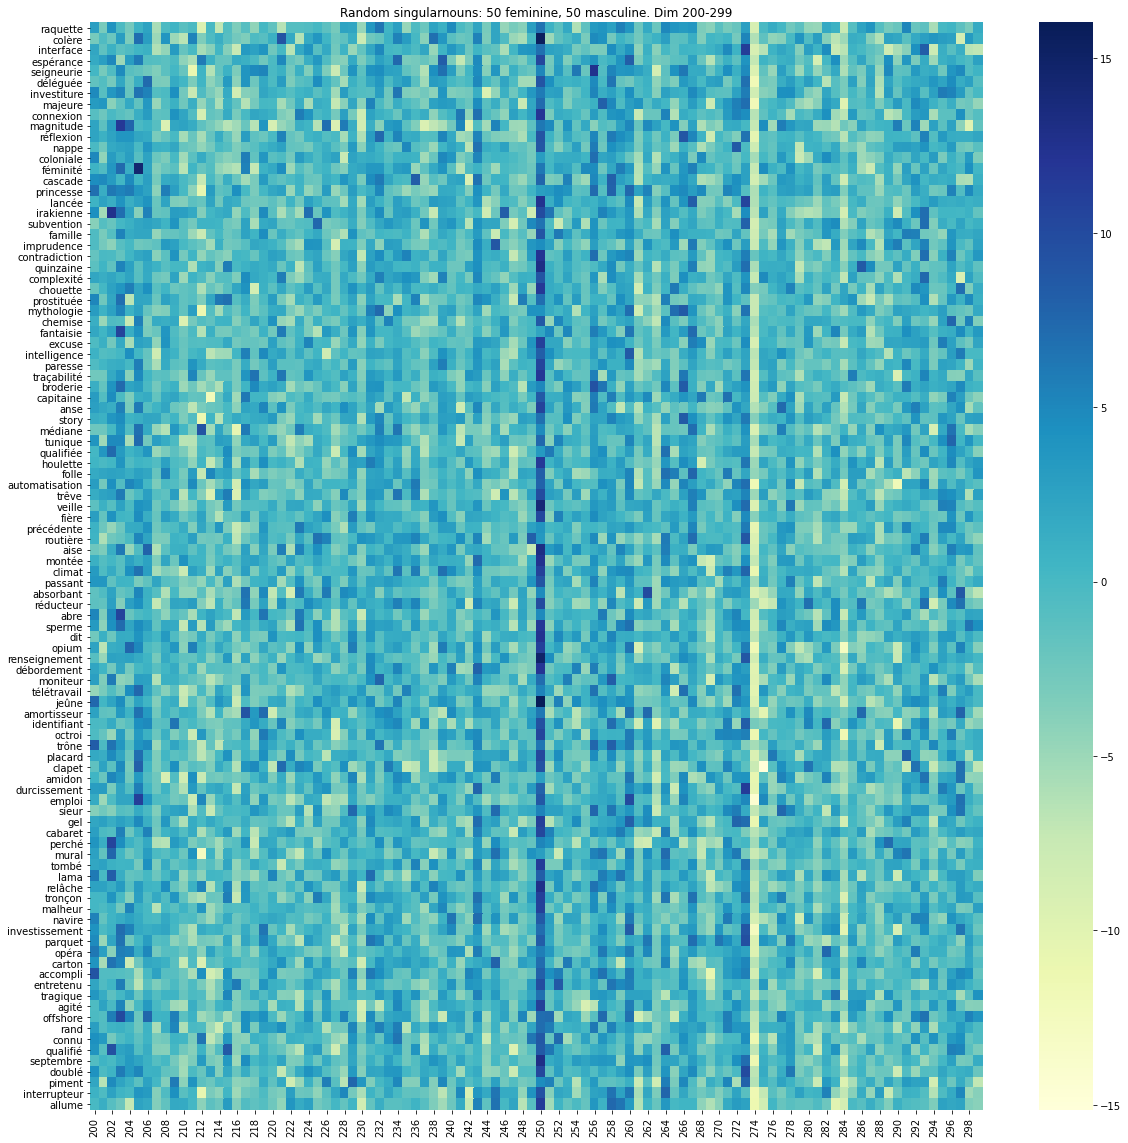

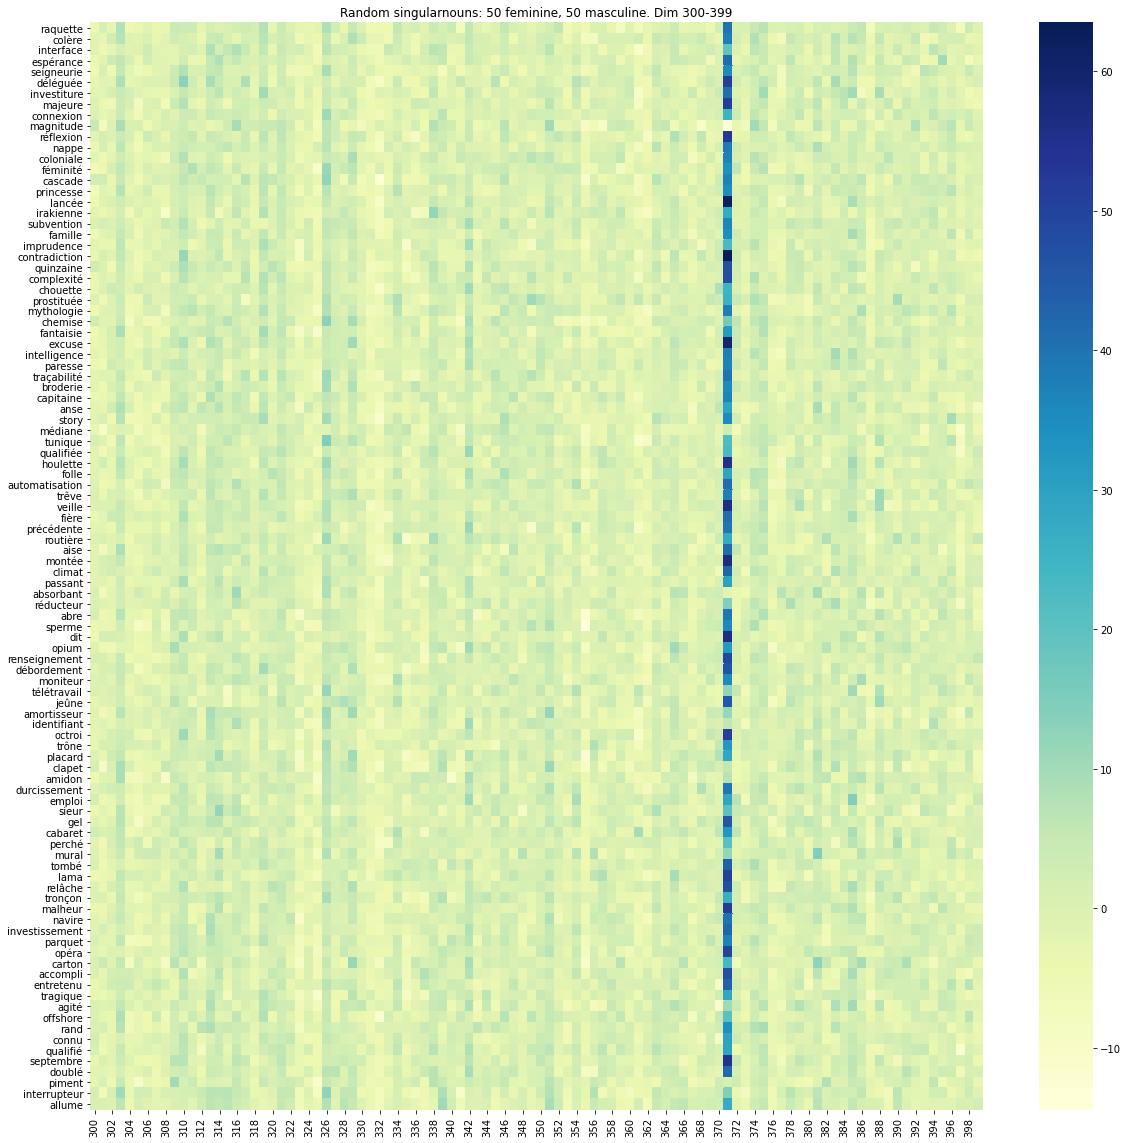

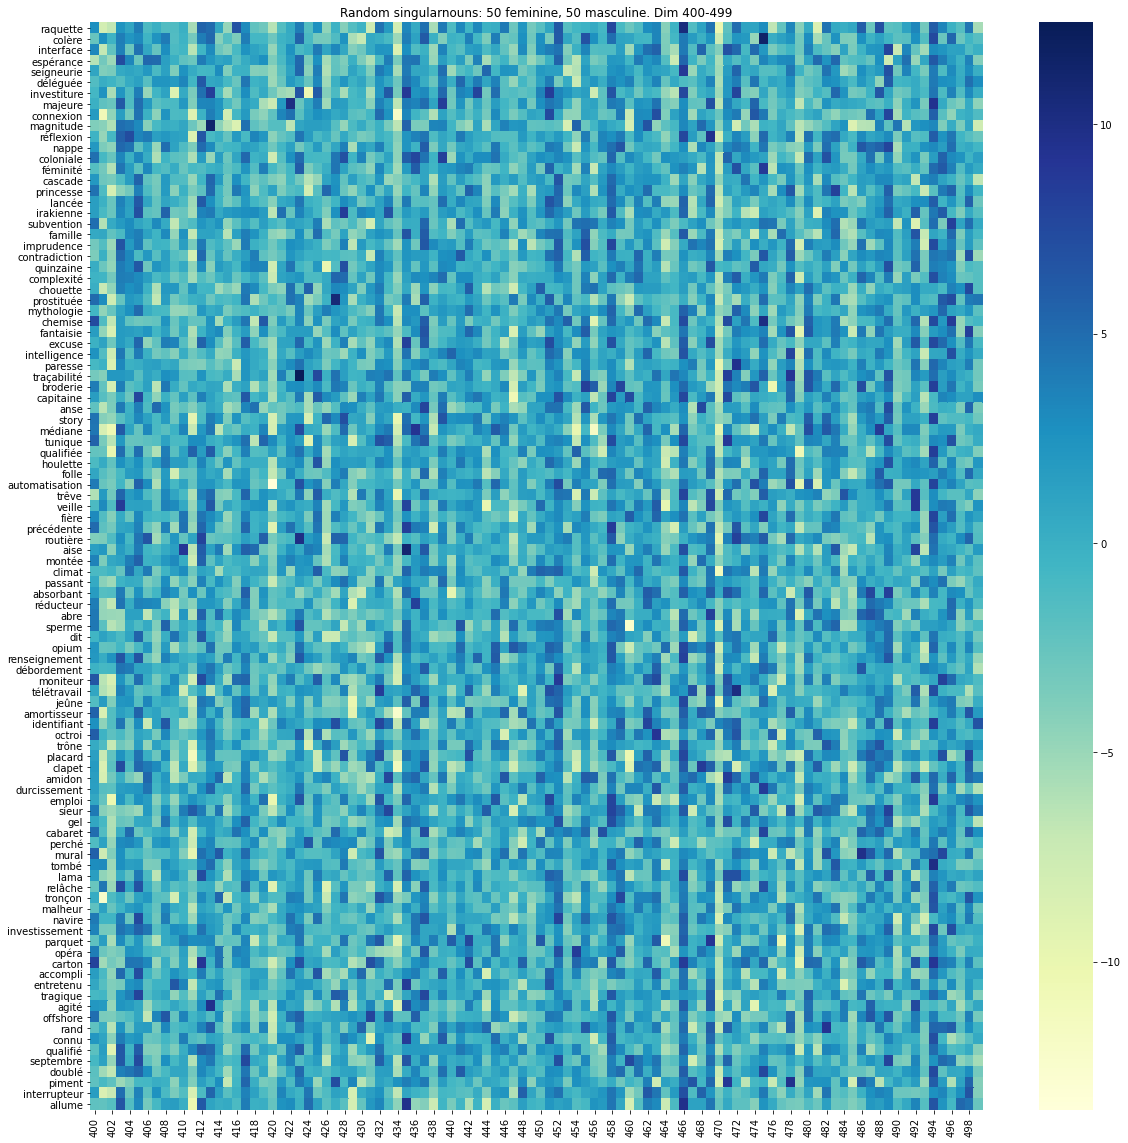

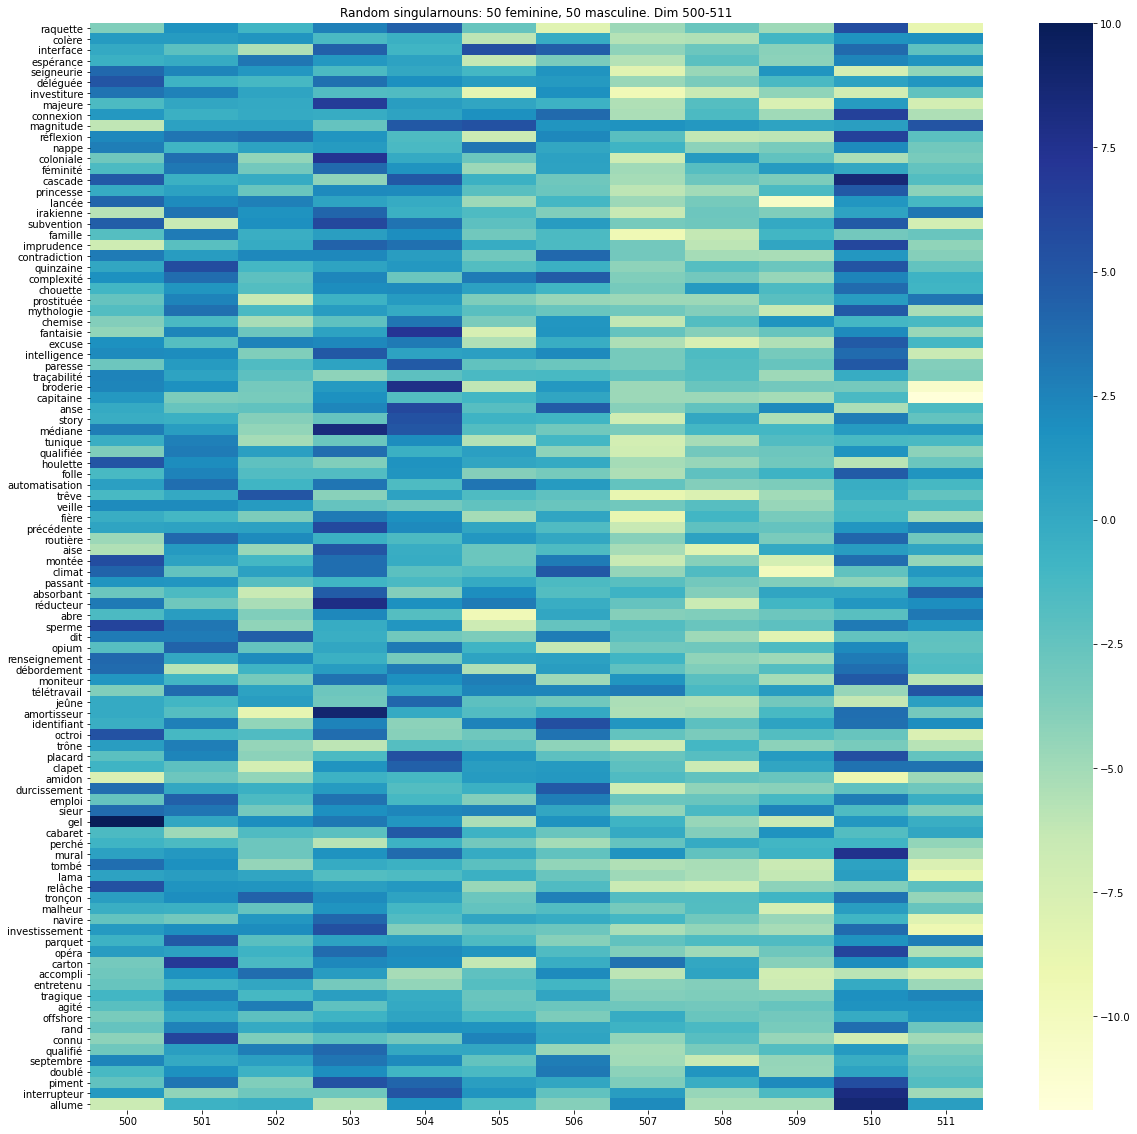

In [20]:
plot_we_heatmap(pd.concat([fem_sg_df.sample(n=50), masc_sg_df.sample(n=50)]), size=(20, 20), label='Random singular' 
                'nouns: 50 feminine, 50 masculine')

In [21]:
masc_pl = nouns_df[(nouns_df.singular.notna()) & (nouns_df.plural.notna()) & (nouns_df.gender == 'masculine')].plural
masc_pl

10         aaléniens
11              abas
12            abacas
13          abacules
14          abaddirs
             ...    
102185        œstres
102186      œstriols
102187    œstrogènes
102193          œufs
102194      œufriers
Name: plural, Length: 42469, dtype: object

In [22]:
masc_pl_df = create_words_df(model, tokenizer, masc_pl, progress=True)

...........................................

In [23]:
fem_sg_df['gn'] = 'singular'
fem_sg_df['gender'] = 'feminine'

fem_pl_df['gn'] = 'plural'
fem_pl_df['gender'] = 'feminine'

masc_sg_df['gn'] = 'singular'
masc_sg_df['gender'] = 'masculine'

masc_pl_df['gn'] = 'plural'
masc_pl_df['gender'] = 'masculine'

noun_we_df = pd.concat([fem_sg_df, fem_pl_df, masc_sg_df, masc_pl_df])

In [24]:
noun_we_df.to_csv('all_nouns_we.csv')